### Exploratory data analysis 

The main objective of this project is to test if an advertising company running an online ad for a client with the intention of increasing brand awareness that the advertising company runs resulted in a significant lift in brand awareness using AB testing.

##### Importing scripts folder

In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))

##### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
from scipy.stats import chi2_contingency, beta
sns.set()

##### Importing scripts folder & modules

In [3]:
from file import Myfile
import util
import plot

##### Loading the data

In [4]:
path = "../data/AdSmartABdata.csv"

In [5]:
# initialize the class that has utility function we are going to use
file = Myfile()

In [6]:
# we use our file function to read csv data
df = file.read_csv(path)

--> file read as csv


In [7]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


#### Exploring the data

##### Basic info about the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


##### Basic description of the dataset

In [9]:
df.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


In [10]:
# column names
list(df.columns)

['auction_id',
 'experiment',
 'date',
 'hour',
 'device_make',
 'platform_os',
 'browser',
 'yes',
 'no']

In [11]:
# number of data points
print(f" There are {df.shape[0]} rows and {df.shape[1]} columns")

 There are 8077 rows and 9 columns


In [12]:
#check for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8072    False
8073    False
8074    False
8075    False
8076    False
Length: 8077, dtype: bool

In [13]:
#Drop if there is any duplicates in the dataset
df.drop_duplicates()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


In [14]:
#check for null values
df.isna().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [15]:
#check for missing values
util.percent_missing(df)

The dataset contains 0.0 % missing values.


In [16]:
#check for data types or handling data types
df.dtypes

auction_id     object
experiment     object
date           object
hour            int64
device_make    object
platform_os     int64
browser        object
yes             int64
no              int64
dtype: object

##### Handling data types

In [17]:
#convert date column to date type
df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d')

##### Types of device, OS platiform and Browser

In [18]:
print(f'device types: ',df['device_make'].nunique())
print(f'Operating system platforms:',df['platform_os'].nunique())
print(f'Browser types: ',df['browser'].nunique())

device types:  270
Operating system platforms: 3
Browser types:  15


##### Checking Browser

In [19]:
browser = df.groupby('browser').agg({'yes': 'sum','no': 'sum'})
browser.sort_values(by=['yes','no'], ascending=False)

,yes,no
browser,,
Chrome Mobile,314,381
Chrome Mobile WebView,116,111
Facebook,69,87
Samsung Internet,67,78
Mobile Safari,4,10
Chrome,1,1
Chrome Mobile iOS,1,0
Mobile Safari UI/WKWebView,0,3
Android,0,0


In [20]:
browser.describe()

,yes,no
count,15.000000,15.000000
mean,38.133333,44.733333
std,84.307148,100.437946
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,35.500000,44.000000
max,314.000000,381.000000


In [21]:
browser_data_count = df['browser'].value_counts()

<AxesSubplot:>

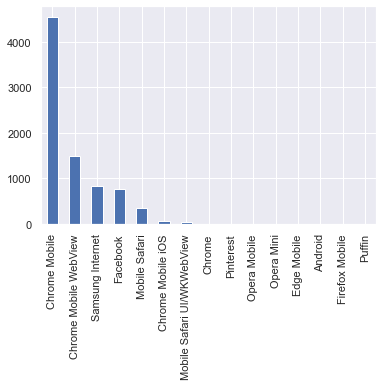

In [22]:
browser_data_count.plot.bar()

From this graph we observ that the most usable browser by the user is the chrome Mobile 
and Chrom Mobile WebView and Samsung Internet ae the second and the third top user

##### Checking Platiform OS

In [23]:
platform_os_metrics = df.groupby('platform_os').agg({'yes': 'sum','no': 'sum'})
platform_os_metrics.sort_values(by=['yes','no'], ascending=False)

,yes,no
platform_os,,
6,567,659
5,5,12
7,0,0


In [24]:
platform_os_metrics.describe()

,yes,no
count,3.000000,3.000000
mean,190.666667,223.666667
std,325.923815,377.057467
min,0.000000,0.000000
25%,2.500000,6.000000
50%,5.000000,12.000000
75%,286.000000,335.500000
max,567.000000,659.000000


<AxesSubplot:xlabel='platform_os', ylabel='count'>

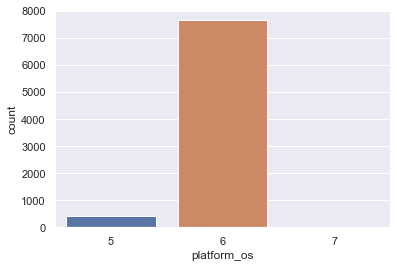

In [25]:
sns.countplot(data=df, x='platform_os')

This shows that most of the users use platform_os 6

##### Checking Device Make

In [26]:
device_metrics = df.groupby('device_make').agg({'yes': 'sum','no': 'sum'})
device_metrics.sort_values(by=['yes','no'], ascending=False)

,yes,no
device_make,,
Generic Smartphone,321,398
Samsung SM-G960F,21,24
Samsung SM-G950F,16,19
Samsung SM-G930F,11,5
Samsung SM-G973F,10,12
...,...,...
XiaoMi Redmi Note 8,0,0
XiaoMi Redmi Note 8 Pro,0,0
XiaoMi Redmi Note 8T,0,0


In [27]:
device_metrics.describe()

,yes,no
count,270.000000,270.000000
mean,2.118519,2.485185
std,19.627404,24.296759
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,321.000000,398.000000


##### Checking Outlier Detection

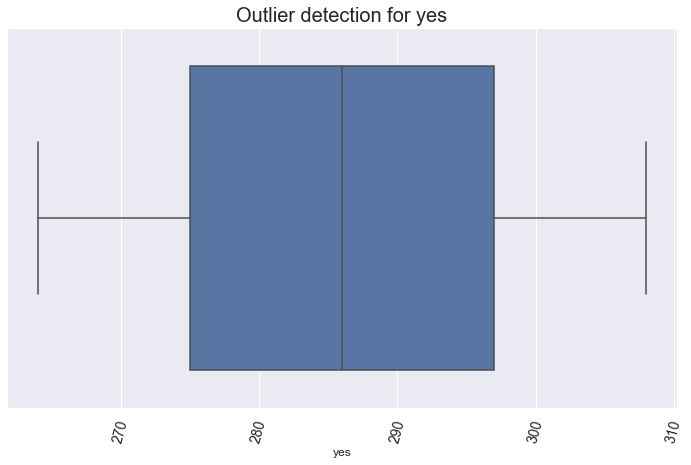

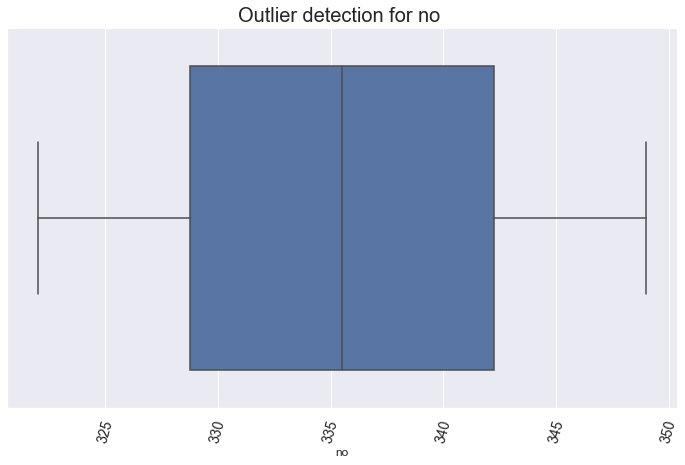

In [28]:
experiment = df.groupby('experiment').agg({'yes': 'sum','no': 'sum'})

plot.plot_box(experiment, 'yes', 'Outlier detection for yes')
plot.plot_box(experiment, 'no', 'Outlier detection for no ')

In [29]:
print(f"Number of unique users in the experiement: {df['auction_id'].nunique()}")
print(f"Percentage of users in control group: {round(df[df['experiment'] == 'control']['auction_id'].nunique() / df['auction_id'].nunique() * 100, 2)}%")
print(f"Percentage of users in exposed group: {round(df[df['experiment'] == 'exposed']['auction_id'].nunique() / df['auction_id'].nunique() * 100, 2)}%")

Number of unique users in the experiement: 8077
Percentage of users in control group: 50.4%
Percentage of users in exposed group: 49.6%


In [30]:
experment = df['experiment'].value_counts()
experment

control    4071
exposed    4006
Name: experiment, dtype: int64

<AxesSubplot:ylabel='auction_id'>

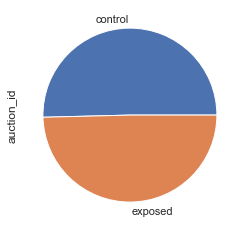

In [31]:
df.groupby('experiment')['auction_id'].count().plot.pie()

In [32]:
# Divide into participated and non-participated
participated_df = df[~((df['yes']== 0) & (df['no']== 0))]
nparticipated_df =  df[(df['yes']== 0) & (df['no']== 0)]

In [33]:
print(f"{participated_df.shape[0]} participants participated")
print(f"{nparticipated_df.shape[0]} participants did not participate")

1243 participants participated
6834 participants did not participate


Out of 8077 unique users, 1243 participants participated and 6834 participants did not participate

In [34]:
experiment.sort_values(by=['yes','no'], ascending=False)

,yes,no
experiment,,
exposed,308,349
control,264,322


this indicates that, most of the user responds no in both group

<AxesSubplot:xlabel='experiment'>

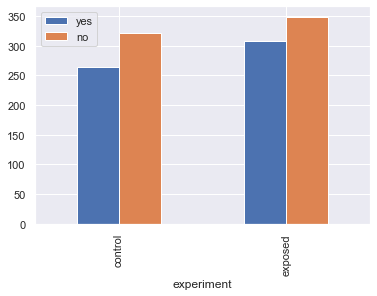

In [35]:
experiment.plot.bar()

In [36]:
experiment.describe()

,yes,no
count,2.000000,2.000000
mean,286.000000,335.500000
std,31.112698,19.091883
min,264.000000,322.000000
25%,275.000000,328.750000
50%,286.000000,335.500000
75%,297.000000,342.250000
max,308.000000,349.000000


In [37]:
df['date'].nunique()


8

In [38]:
platform_os_metrics = df.groupby('date').agg({'yes': 'sum','no': 'sum'})
platform_os_metrics.sort_values(by=['yes', 'no'], ascending=False)
#dt.head(10)

,yes,no
date,,
2020-07-03,147,178
2020-07-09,85,99
2020-07-08,85,92
2020-07-04,76,83
2020-07-10,54,70
2020-07-05,52,65
2020-07-07,38,45
2020-07-06,35,39


so we see that most of the data are collected from 2020-07-03

<AxesSubplot:xlabel='date', ylabel='count'>

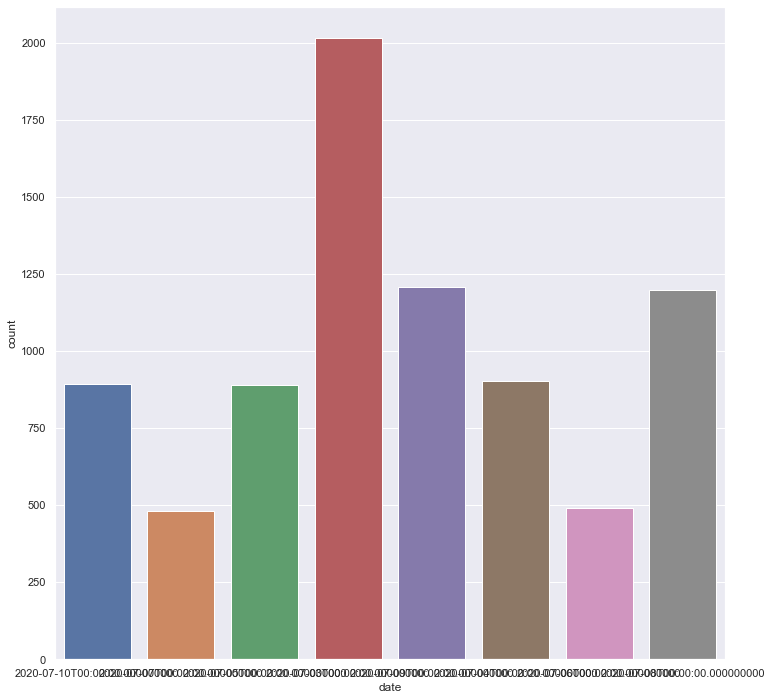

In [39]:
plt.figure(figsize=(12,12))
sns.countplot(data=df, x='date')

<AxesSubplot:xlabel='hour', ylabel='count'>

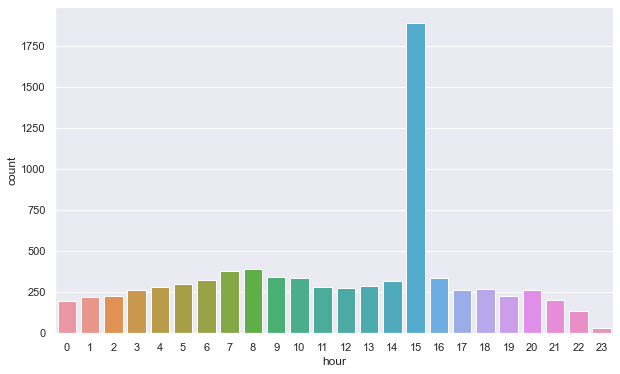

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='hour')

Most of the users saw the ad at 15:00